# Predicting Student Mental Health  Using Machine Learning
*Author:* Sulha Shibin P 
*Organization:* Entri Elevate  
*Date:* 01/07/2024


## Table of Contents
1. [Overview of Problem Statement](#overview-of-problem-statement)
2. [Objective](#objective)
3. [Data Collection](#data-collection)
4. [Data Description](#data-description)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
6. [Data Preprocessing](#data-preprocessing)
7. [Feature Engineering](#feature-engineering)
8. [Data Encoding](#data-encoding)
9. [Feature Selection](#feature-selection)
10. [Splitting](#splitting)
11. [Scaling](#scaling)
12. [Model Selection](#Model-selection)
14. [Train and Evaluation of Model](#evaluation-of-model)
15. [Result](#result)
16. [Model Deployment](#model-deployment)
17. [Limitations](#limitations)
18. [Conclusion](#conclusion)
19. [Future Work](#future-work)

   
   


## 1.Overview of the Problem Statement
 Predicting student mental health by analyzing various factors to identify students at risk for high stress, anxiety, or depression.”\


## 2.Objective
 Develop a predictive model to identify students at risk of mental health issues. The target variable for the model is the *Overall Mental Health Score*, which is a composite score calculated using the Depression Score, Anxiety Score, and Stress Level. The model aims to analyze factors like sleep quality, diet quality, and other relevant variables to predict this Overall Mental Health Score with high accuracy.

## 3.Data Collection

In [2]:
# Import required libraries
import pandas as pd                  
import numpy as np                   
import matplotlib.pyplot as plt      
import seaborn as sns    

#Load the dataset from a csv file
data = pd.read_csv("students_mental_health_survey.csv")
data.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


## 4.Data Description

In [3]:
# Display the shape of the dataset
data.shape

(7022, 20)



##### Detailed Description of Features


- *Age:*        The age of the student.
- *Course:*     The course or program the student is enrolled in.
- *Gender:*      The gender of the student.
- *Stress Level:*   A numeric score representing the level of stress experienced by the student.
- *Depression Score:* A numeric score representing the level of depression experienced by the student.
- *Anxiety Level:* A numeric score representing the level of anxiety experienced by the student.
- *Sleep Quality:* A categorical variable representing the quality of the student’s sleep (e.g., Poor, Average, Good).
- *Diet Quality:* A categorical variable representing the quality of the student’s diet (e.g., Poor, Average, Good, ).
- *Physical Activity:* A categorical variable representing the level of physical activity engaged in by the student (e.g., Low, Moderate, High).
- *Social Support:* A categorical variable representing the level of social support the student receives (e.g., Low, Moderate, High).
- *Relationship Status:* A categorical variable representing the current relationship status of the student (e.g., Single, In a Relationship).
- *Substance Use:* A categorical variable representing the extent of substance use by the student (e.g., Never, Occasional, Frequently).
- *Counseling Service Use:* A binary variable indicating whether the student has used counseling services (Yes/No).
- *Family History:* A binary variable indicating if there is a family history of mental health issues (Yes/No).
- *Chronic Illness:* A binary variable indicating if the student has a chronic illness (Yes/No).
- *Financial Stress:* A numeric score representing the level of financial stress experienced by the student.
- *Extracurricular Involvement:* A categorical variable representing the level of involvement in extracurricular activities 
- *Semester Credit Load:* The number of credits the student is enrolled in for the semester.
- *Residence Type:* A categorical variable representing the type of accommodation the student is living in (e.g., On-campus, Off-campus).


## 5.EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [5]:
data.describe()

,Age,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Financial_Stress,Semester_Credit_Load
count,7022.000000,7010.00000,7022.000000,7022.000000,7022.000000,7022.000000,7022.000000
mean,23.003418,3.49127,2.427941,2.254486,2.300484,2.453005,22.010538
std,3.853978,0.28742,1.638408,1.625193,1.624305,1.708995,4.358380
min,18.000000,2.44000,0.000000,0.000000,0.000000,0.000000,15.000000
25%,20.000000,3.29000,1.000000,1.000000,1.000000,1.000000,18.000000
50%,22.000000,3.50000,2.000000,2.000000,2.000000,2.000000,22.000000
75%,25.000000,3.70000,4.000000,3.000000,4.000000,4.000000,26.000000
max,35.000000,4.00000,5.000000,5.000000,5.000000,5.000000,29.000000


In [6]:
data.isnull().sum()  #missing values

Age                             0
Course                          0
Gender                          0
CGPA                           12
Stress_Level                    0
Depression_Score                0
Anxiety_Score                   0
Sleep_Quality                   0
Physical_Activity               0
Diet_Quality                    0
Social_Support                  0
Relationship_Status             0
Substance_Use                  15
Counseling_Service_Use          0
Family_History                  0
Chronic_Illness                 0
Financial_Stress                0
Extracurricular_Involvement     0
Semester_Credit_Load            0
Residence_Type                  0
dtype: int64

In [7]:
data.dtypes  #Checking Data Types

Age                              int64
Course                          object
Gender                          object
CGPA                           float64
Stress_Level                     int64
Depression_Score                 int64
Anxiety_Score                    int64
Sleep_Quality                   object
Physical_Activity               object
Diet_Quality                    object
Social_Support                  object
Relationship_Status             object
Substance_Use                   object
Counseling_Service_Use          object
Family_History                  object
Chronic_Illness                 object
Financial_Stress                 int64
Extracurricular_Involvement     object
Semester_Credit_Load             int64
Residence_Type                  object
dtype: object

In [8]:
data.duplicated().any()  # Checking Duplicate Values

False

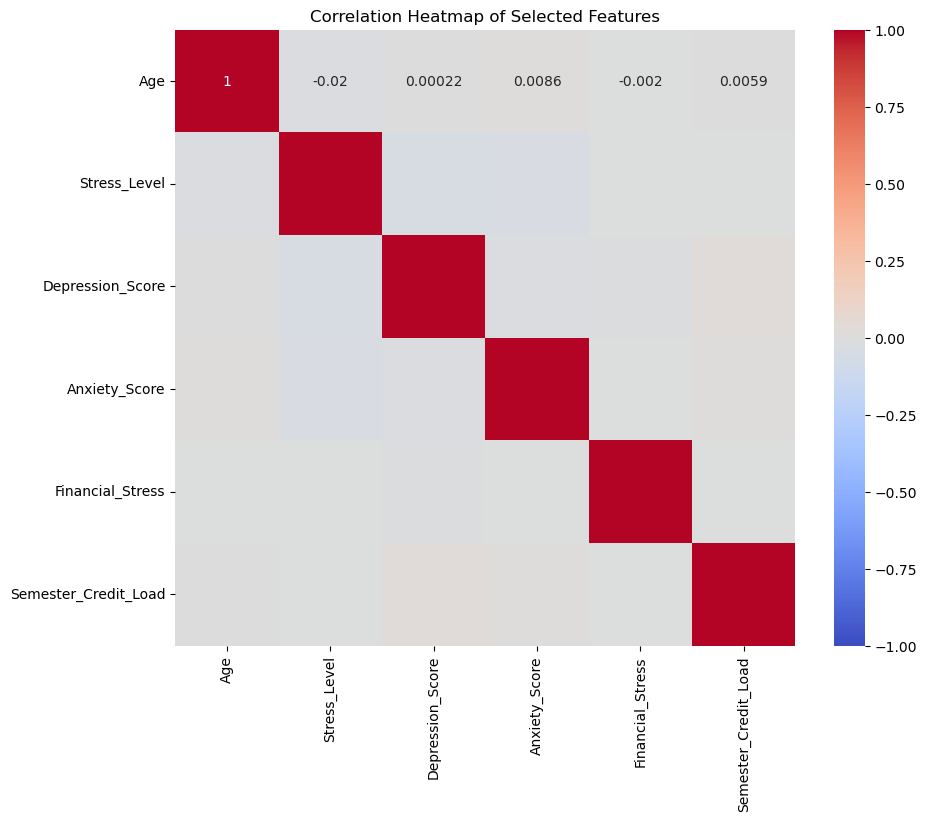

In [9]:
#Checking Correlation
features_of_interest = data[['Age', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress', 'Semester_Credit_Load']]
corr_matrix = features_of_interest.corr()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


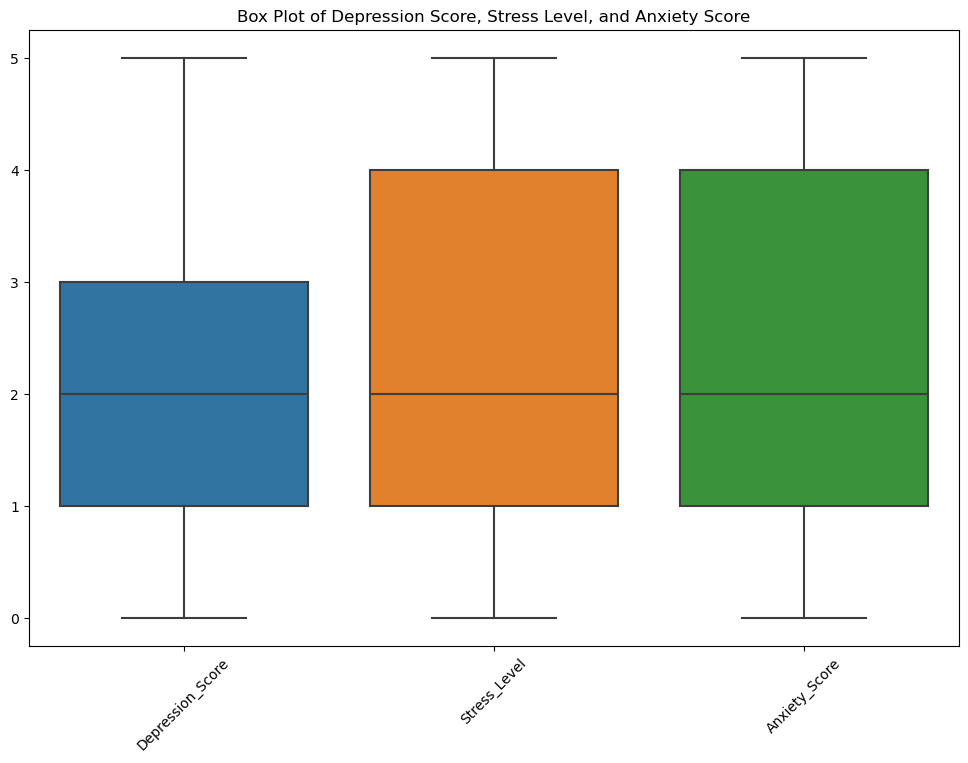

In [10]:
#Checking Outliers & Skewness
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[[ 'Depression_Score', 'Stress_Level', 'Anxiety_Score']])
plt.xticks(rotation=45)
plt.title('Box Plot of Depression Score, Stress Level, and Anxiety Score')
plt.show()


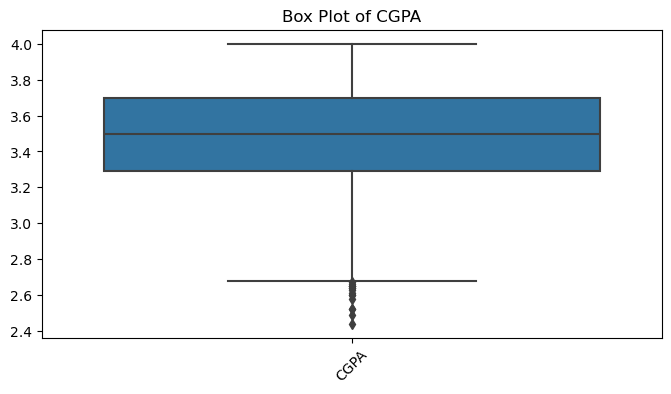

In [11]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=data[[ 'CGPA']])
plt.xticks(rotation=45)
plt.title('Box Plot of CGPA')
plt.show()


#### Outlier Detection Using Z SCORE

In [12]:
import numpy as np
import pandas as pd

# Assuming `data` is your DataFrame
# Numerical features
numerical_features = ['Age', 'Stress_Level', 'Depression_Score', 'Anxiety_Score', 'Financial_Stress', 'Semester_Credit_Load']

# Z-Score method
for feature in numerical_features:
    z_scores = np.abs((data[feature] - data[feature].mean()) / data[feature].std())
    outliers = data[z_scores > 3]
    
    # Display only the feature and its outlier values
    outliers_only = outliers[[feature]]
    print(f'Outliers in {feature} using Z-Score:\n', outliers_only)


Outliers in Age using Z-Score:
       Age
26     35
47     35
266    35
420    35
451    35
563    35
658    35
798    35
851    35
965    35
989    35
1160   35
1531   35
1707   35
2001   35
2063   35
2113   35
2184   35
3059   35
3068   35
3085   35
3090   35
3629   35
4002   35
4544   35
4620   35
4628   35
5481   35
5710   35
5732   35
6296   35
Outliers in Stress_Level using Z-Score:
 Empty DataFrame
Columns: [Stress_Level]
Index: []
Outliers in Depression_Score using Z-Score:
 Empty DataFrame
Columns: [Depression_Score]
Index: []
Outliers in Anxiety_Score using Z-Score:
 Empty DataFrame
Columns: [Anxiety_Score]
Index: []
Outliers in Financial_Stress using Z-Score:
 Empty DataFrame
Columns: [Financial_Stress]
Index: []
Outliers in Semester_Credit_Load using Z-Score:
 Empty DataFrame
Columns: [Semester_Credit_Load]
Index: []


#### Outlier Detection Using IQR 

In [13]:

# IQR method
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers_iqr = data[(data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR))]
    
    # Display only the feature and its outlier values
    outliers_only = outliers_iqr[[feature]]
    print(f'Outliers in {feature} using IQR:\n', outliers_only)


Outliers in Age using IQR:
       Age
26     35
47     35
266    35
353    34
406    33
...   ...
6900   33
6943   33
6968   33
6978   33
7004   33

[131 rows x 1 columns]
Outliers in Stress_Level using IQR:
 Empty DataFrame
Columns: [Stress_Level]
Index: []
Outliers in Depression_Score using IQR:
 Empty DataFrame
Columns: [Depression_Score]
Index: []
Outliers in Anxiety_Score using IQR:
 Empty DataFrame
Columns: [Anxiety_Score]
Index: []
Outliers in Financial_Stress using IQR:
 Empty DataFrame
Columns: [Financial_Stress]
Index: []
Outliers in Semester_Credit_Load using IQR:
 Empty DataFrame
Columns: [Semester_Credit_Load]
Index: []


#### Outlier Detection For Categorical Variables

In [14]:
categorical_features = ['Course', 'Gender', 'Sleep_Quality', 'Diet_Quality', 'Physical_Activity', 
                        'Social_Support', 'Relationship_Status', 'Substance_Use', 
                        'Counseling_Service_Use', 'Family_History', 'Chronic_Illness', 
                        'Extracurricular_Involvement', 'Residence_Type']

# Check value counts for each categorical feature
for feature in categorical_features:
    value_counts = data[feature].value_counts()
    print(f'Value counts for {feature}:\n', value_counts)
    # You can identify any categories with very low counts


Value counts for Course:
 Course
Medical             2105
Law                 1385
Engineering         1072
Computer Science    1028
Business             717
Others               715
Name: count, dtype: int64
Value counts for Gender:
 Gender
Male      3547
Female    3475
Name: count, dtype: int64
Value counts for Sleep_Quality:
 Sleep_Quality
Good       3589
Average    2735
Poor        698
Name: count, dtype: int64
Value counts for Diet_Quality:
 Diet_Quality
Average    4268
Good       1385
Poor       1369
Name: count, dtype: int64
Value counts for Physical_Activity:
 Physical_Activity
Moderate    3521
Low         2091
High        1410
Name: count, dtype: int64
Value counts for Social_Support:
 Social_Support
Moderate    3470
High        2176
Low         1376
Name: count, dtype: int64
Value counts for Relationship_Status:
 Relationship_Status
Single               3574
In a Relationship    2079
Married              1369
Name: count, dtype: int64
Value counts for Substance_Use:
 Substanc

## 6.Data Preprocessing

#### Handling Missing Values

In [15]:

data.dropna(subset=['Substance_Use'], inplace=True)
data['CGPA'].fillna(data['CGPA'].mean(), inplace=True)

## 7.Feature Engineering

In [16]:
# Create the target variable
data['Overall_Mental_Health_Score'] = data[['Stress_Level', 'Depression_Score', 'Anxiety_Score']].mean(axis=1)


In [17]:
# Create additional features
data['High_Risk_Indicator'] = (data['Overall_Mental_Health_Score'] > 1).astype(int)
data.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,...,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type,Overall_Mental_Health_Score,High_Risk_Indicator
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,...,Never,Never,No,No,2,Moderate,17,On-Campus,2.666667,1
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,...,Occasionally,Occasionally,No,No,3,Low,27,On-Campus,1.000000,0
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,...,Never,Occasionally,No,No,4,High,15,On-Campus,2.333333,1
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,...,Never,Never,No,Yes,0,High,23,On-Campus,3.333333,1
5,21,Medical,Female,3.35,2,4,3,Good,Moderate,Good,...,Never,Never,No,No,5,Moderate,19,Off-Campus,3.000000,1


## 8.Data Encoding

In [18]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Course'] = label_encoder.fit_transform(data['Course'])


In [19]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=['Gender', 'Relationship_Status', 'Chronic_Illness', 'Residence_Type'], dtype=int)


In [20]:
# Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder  
ordinal_features = ['Diet_Quality', 'Sleep_Quality', 'Substance_Use', 'Social_Support', 'Physical_Activity', 'Extracurricular_Involvement', 'Counseling_Service_Use']
ordinal_categories = [['Poor', 'Average', 'Good'], ['Poor', 'Average', 'Good'], ['Never', 'Occasionally', 'Frequently'], ['Low', 'Moderate', 'High'], ['Low', 'Moderate', 'High'], ['Low', 'Moderate', 'High'], ['Never', 'Occasionally', 'Frequently']]
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
data[ordinal_features] = ordinal_encoder.fit_transform(data[ordinal_features])
data.head()


,Age,Course,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,...,Gender_Female,Gender_Male,Relationship_Status_In a Relationship,Relationship_Status_Married,Relationship_Status_Single,Chronic_Illness_No,Chronic_Illness_Yes,Residence_Type_Off-Campus,Residence_Type_On-Campus,Residence_Type_With Family
0,25,5,3.56,3,3,2,2.0,1.0,2.0,1.0,...,0,1,0,1,0,1,0,0,1,0
1,24,2,2.44,0,3,0,1.0,0.0,1.0,0.0,...,1,0,0,0,1,1,0,0,1,0
2,19,0,3.74,4,0,3,2.0,0.0,1.0,1.0,...,1,0,1,0,0,1,0,0,1,0
4,18,0,3.40,3,3,4,2.0,0.0,1.0,2.0,...,0,1,0,1,0,0,1,0,1,0
5,21,4,3.35,2,4,3,2.0,1.0,2.0,2.0,...,1,0,0,0,1,1,0,1,0,0


## 9.Feature Selection

In [21]:
# Define the target variable and features
X = data.drop(columns=['Overall_Mental_Health_Score'])
y = data['Overall_Mental_Health_Score']


In [22]:
# Ensure all features in X are numeric before correlation calculation
X_numeric= X.select_dtypes(include=[np.number])


In [23]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with low variance
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold as needed
X_high_variance = selector.fit_transform(X_numeric)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Choose a smaller number
fit = rfe.fit(X_numeric, y)
selected_features_rfe = X_numeric.columns[fit.support_].tolist()


In [25]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select the top k features
selector = SelectKBest(score_func=f_regression, k=5)  # Choose a smaller k
X_new = selector.fit_transform(X_numeric, y)
selected_features_kbest = X_numeric.columns[selector.get_support()].tolist()


In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_numeric, y)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_numeric.columns, 'Importance': importances})
top_features = feature_importance_df.nlargest(5, 'Importance')['Feature'].tolist()  # Adjust the number


In [27]:
import numpy as np

# Calculate correlation matrix
correlation_matrix = X_numeric.corr()

# Find features with high correlation
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust threshold
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Drop highly correlated features
X_reduced = X_numeric.drop(columns=correlated_features, errors='ignore')


In [28]:
# Combine selected features from various methods
final_selected_features = list(set(selected_features_rfe) | set(selected_features_kbest) | set(top_features))
print("Final Selected Features:", final_selected_features)

# Use the final selected features for modeling
X = X[final_selected_features]


Final Selected Features: ['Relationship_Status_Married', 'Depression_Score', 'High_Risk_Indicator', 'Anxiety_Score', 'CGPA', 'Stress_Level', 'Course']


## 10.Splitting

In [29]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 11.Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 12.Model Selection

In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


## 13.Train and Evaluate Models

#### Linear Regression (without regularization)

In [32]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

print("Linear Regression:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}, Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R²: {r2_score(y_train, y_train_pred)}, Test R²: {r2_score(y_test, y_test_pred)}\n")


Linear Regression:
Train MSE: 1.0146917431632614e-30, Test MSE: 1.0037767373109135e-30
Train R²: 1.0, Test R²: 1.0



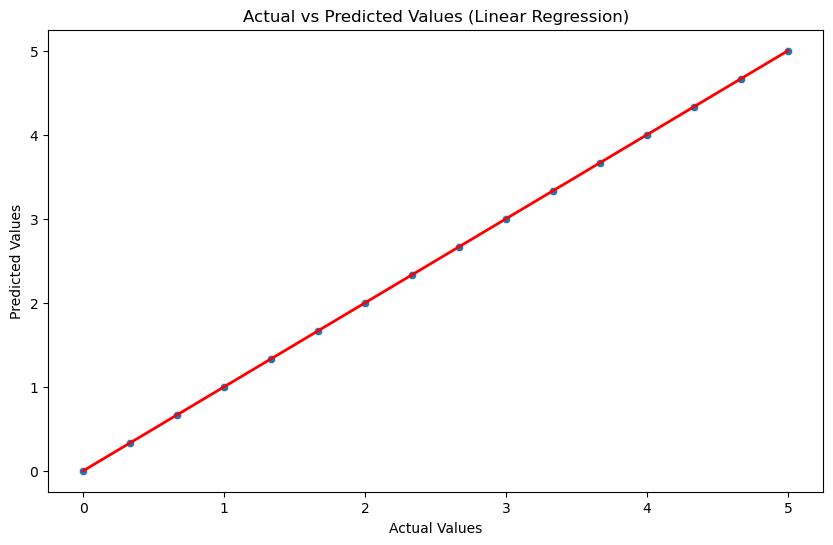

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs. Predicted Plot for Ridge Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

#### Lasso Regression (L1 Regularization)

In [34]:
lasso = Lasso()
lasso_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(X_train_scaled, y_train)

best_lasso = lasso_cv.best_estimator_

y_train_pred = best_lasso.predict(X_train_scaled)
y_test_pred = best_lasso.predict(X_test_scaled)

print("Lasso Regression:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}, Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R²: {r2_score(y_train, y_train_pred)}, Test R²: {r2_score(y_test, y_test_pred)}\n")


Lasso Regression:
Train MSE: 0.032340451969236246, Test MSE: 0.03313224137706264
Train R²: 0.9606315722162032, Test R²: 0.9605974566081147



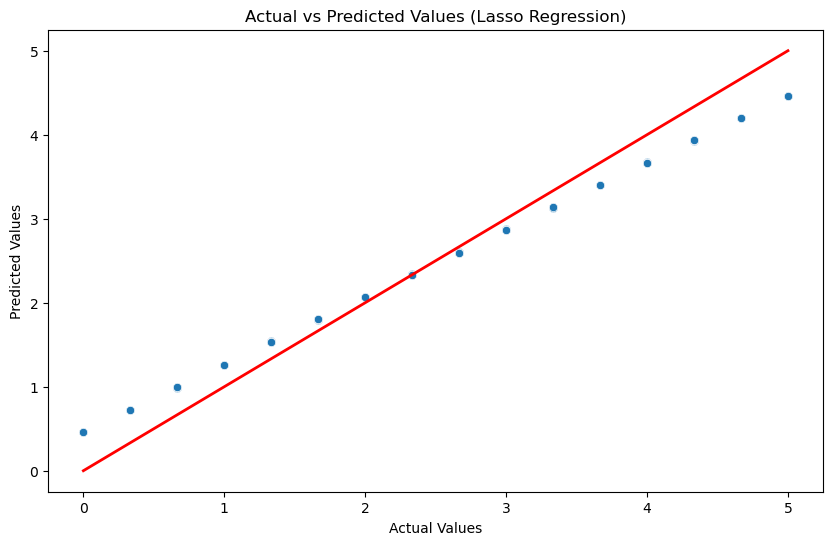

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs. Predicted Plot for Ridge Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.show()

#### Ridge Regression (L2 Regularization)

In [46]:
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

best_ridge = ridge_cv.best_estimator_

y_train_pred = best_ridge.predict(X_train_scaled)
y_test_pred = best_ridge.predict(X_test_scaled)

print("Ridge Regression:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}, Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R²: {r2_score(y_train, y_train_pred)}, Test R²: {r2_score(y_test, y_test_pred)}\n")


Ridge Regression:
Train MSE: 5.879262451544379e-10, Test MSE: 5.968904395708659e-10
Train R²: 0.9999999992843102, Test R²: 0.9999999992901476



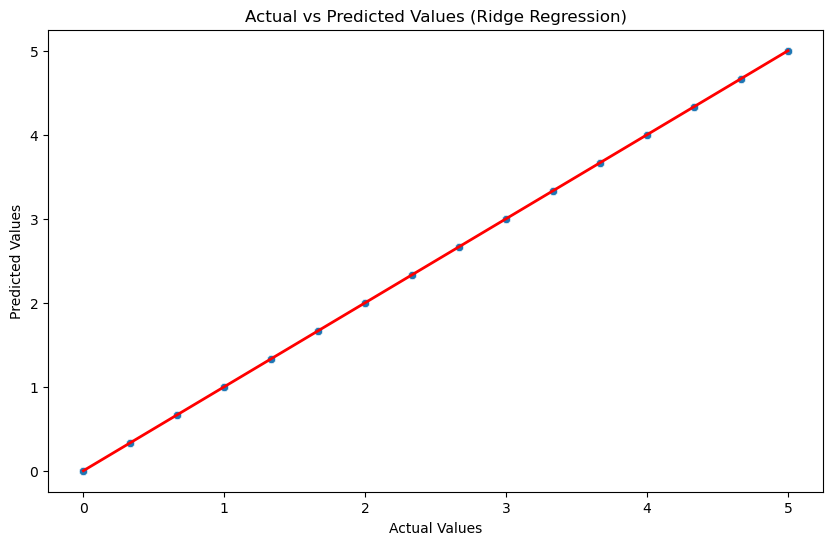

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs. Predicted Plot for Ridge Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.show()

#### Elastic Net Regression (Combination of L1 and L2 Regularization)

In [38]:
elastic_net = ElasticNet()
elastic_net_params = {'alpha': [0.1, 1.0, 10.0, 100.0], 'l1_ratio': [0.2, 0.5, 0.8]}
elastic_net_cv = GridSearchCV(elastic_net, elastic_net_params, cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)

best_elastic_net = elastic_net_cv.best_estimator_

y_train_pred = best_elastic_net.predict(X_train_scaled)
y_test_pred = best_elastic_net.predict(X_test_scaled)

print("Elastic Net Regression:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}, Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R²: {r2_score(y_train, y_train_pred)}, Test R²: {r2_score(y_test, y_test_pred)}\n")


Elastic Net Regression:
Train MSE: 0.01230869292711883, Test MSE: 0.012496797141985408
Train R²: 0.9850164775348483, Test R²: 0.9851381744433517



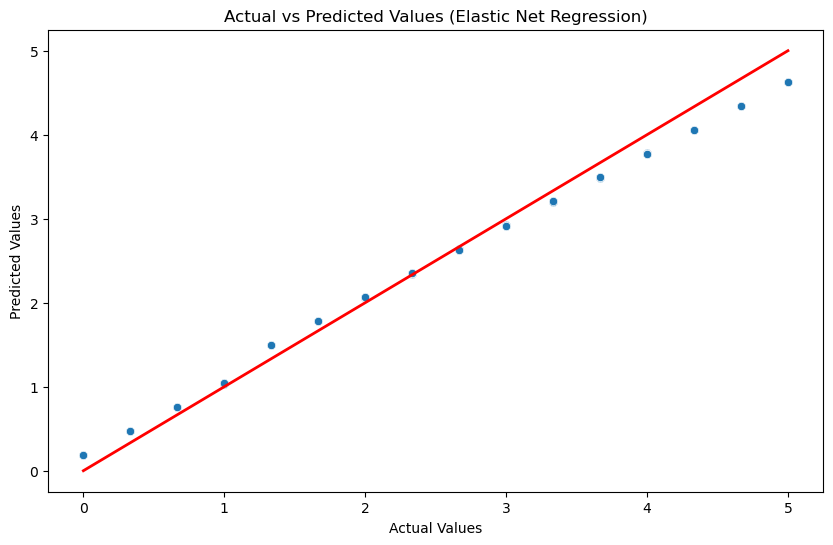

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs. Predicted Plot for Ridge Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Elastic Net Regression)')
plt.show()

#### Random Forests (with Hyperparameter Tuning)

In [40]:
random_forest = RandomForestRegressor()
random_forest_params = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
random_forest_cv = GridSearchCV(random_forest, random_forest_params, cv=5)
random_forest_cv.fit(X_train_scaled, y_train)

best_random_forest = random_forest_cv.best_estimator_

y_train_pred = best_random_forest.predict(X_train_scaled)
y_test_pred = best_random_forest.predict(X_test_scaled)

print("Random Forest Regression:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}, Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R²: {r2_score(y_train, y_train_pred)}, Test R²: {r2_score(y_test, y_test_pred)}\n")


Random Forest Regression:
Train MSE: 1.8918796447341918e-06, Test MSE: 5.431394304432473e-06
Train R²: 0.9999976969917662, Test R²: 0.9999935407101704



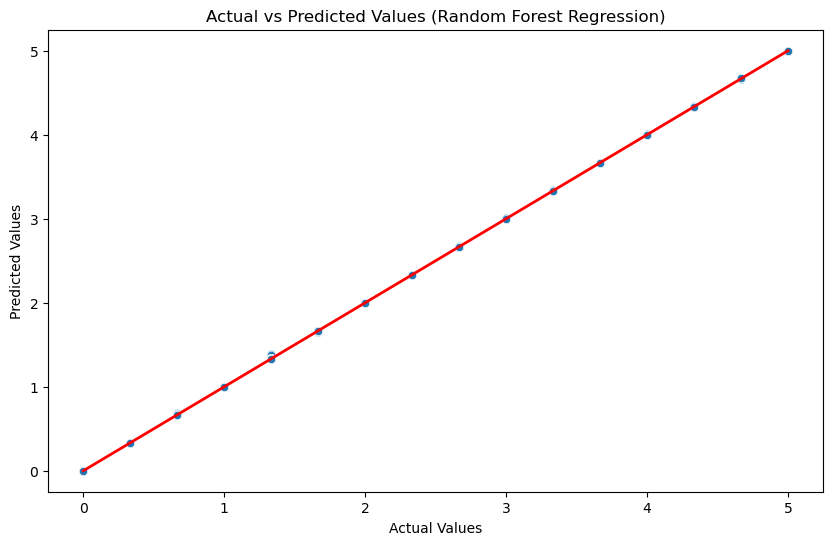

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs. Predicted Plot for Ridge Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest Regression)')
plt.show()


#### Gradient Boosting Machines

In [42]:
gradient_boosting = GradientBoostingRegressor()
gradient_boosting_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
gradient_boosting_cv = GridSearchCV(gradient_boosting, gradient_boosting_params, cv=5)
gradient_boosting_cv.fit(X_train_scaled, y_train)

best_gradient_boosting = gradient_boosting_cv.best_estimator_

y_train_pred = best_gradient_boosting.predict(X_train_scaled)
y_test_pred = best_gradient_boosting.predict(X_test_scaled)

print("Gradient Boosting Regression:")
print(f"Train MSE: {mean_squared_error(y_train, y_train_pred)}, Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Train R²: {r2_score(y_train, y_train_pred)}, Test R²: {r2_score(y_test, y_test_pred)}\n")


Gradient Boosting Regression:
Train MSE: 0.0009157575055331404, Test MSE: 0.0010027790652108008
Train R²: 0.9988852371865938, Test R²: 0.9988074442299337



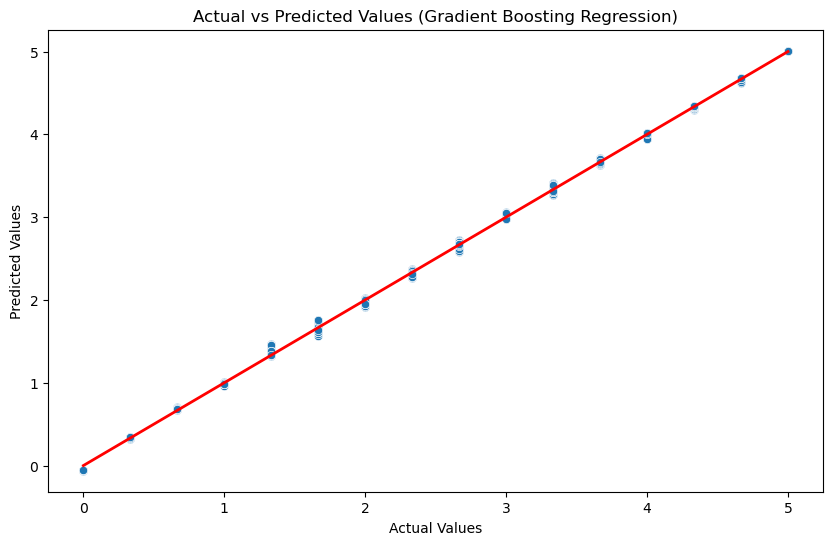

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs. Predicted Plot for Ridge Regression
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line y=x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Gradient Boosting Regression)')
plt.show()


## 14.Result

## 15.Model Deployment


#### Save the Model and Scaler

In [49]:
best_ridge = ridge_cv.best_estimator_
import joblib
# Save the trained model
joblib.dump(best_ridge, 'ridge_model.pkl')
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

## 16.Limitation

## 17.Conclusion


#### Summary of Findings:

## 18.Future Work
